Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

2023-05-16 16:12:55.517161: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-16 16:12:55.541885: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 16:12:55.663284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 16:12:55.664244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 16:12:56.465532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# Hyper-parameters data-loading and formatting

batch_size = 128 #number of samples used in each training iteration
num_classes = 10 #the 10 output neurons representing numbers 0 to 9
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#pixelvalues are normalized to the range 0 to 1
x_train /= 255
x_test /= 255

#convert class vector to binary class matrix
y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


len(x_train) # = 60 000

60000

In [6]:
## Define model ##
model = Sequential() #allows us to build NN by stacking layers on top of each other

#converts 2D input to a 1D vector
#används som transition layer mellan convolutional layers and fully connected layers
#snarare input layer??
model.add(Flatten())

#relu introduces the non-linearity property to the model
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#softmax to get probability dist over the classes (e.g. 0 to 9)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8609 - val_loss: 0.2546 - val_accuracy: 0.9228
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2264 - accuracy: 0.9337 - val_loss: 0.2193 - val_accuracy: 0.9327
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1726 - accuracy: 0.9496 - val_loss: 0.1667 - val_accuracy: 0.9512
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1438 - val_accuracy: 0.9570
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1210 - accuracy: 0.9645 - val_loss: 0.1204 - val_accuracy: 0.9642
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 0.9686 - val_loss: 0.1212 - val_accuracy: 0.9639
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.1126 - val_accuracy: 0.9673
Epoch 

Question 2: Network model, training, and changing hyper-parameters

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


2.1. How many layers does the network in the notebook have? How many neurons does each layer have? 
What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? 
Why do the input and output layers have the dimensions they have?

Answer:
1. Input layer: 28x28=784 input nurons (Flattening layer that converts 2D input to a 1D vector???)
2. Dense layer, consists of 64 neurons
3. Dense layer, consists of 64 neurons
4. Output layer: 10 sigmoid neurons (representing the numbers 0 to 9)

There are two different activation functions here, relu and softmax.
The relu (rectified linear unit) function introduces non-linearity to the output of the previous layer. It does this by setting the negative values to 0 (whilst not changing the positive ones). och?????? 

Softmax activation function is used to get probability distributions over the classes. It uses the output of the previous layer and transforms it into a probability distribution (and at the same time ensuring that the probabilities add up to 1). It is important here because it lets us compare the predicted probabilities from the different numbers (classes).

The total number of parameters is 55 050 (which we can see in the output of the cell above)

2.2. What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function is the categorical_crossentropy. It is appropriate since we are dealing with multiple classes (0 to 9) (enligt vissa sidor står det dock 2 or more output labels). It assigns one-hot category encoding value in form of 0s and 1 to the output label.  
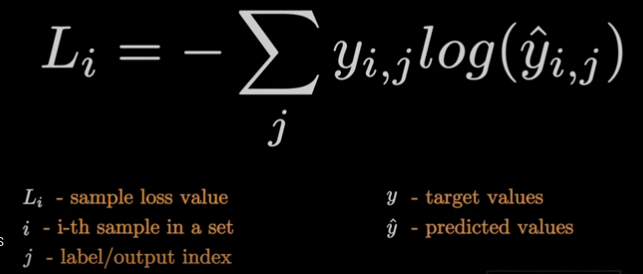
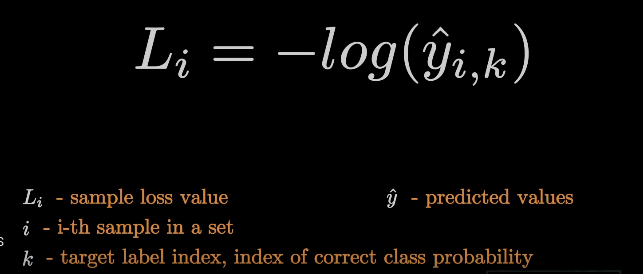
Takes the negative sum of the target value multiplied by the log of the predicted value for each of the values in the distribution. By simplifying using one-hot encoding the latter of the two pictures

https://www.google.com/search?channel=fs&client=ubuntu-sn&q=cateogrical+crossentropy+function#kpvalbx=_fERiZLCYC66Exc8P7pCGwAU_29


2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch

In [8]:
## Define model ##
model_2 = Sequential()

model_2.add(Flatten())

model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(64, activation = 'relu'))

model_2.add(Dense(num_classes, activation='softmax'))


model_2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model_2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.8681 - val_loss: 0.2555 - val_accuracy: 0.9240
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2234 - accuracy: 0.9349 - val_loss: 0.2079 - val_accuracy: 0.9360
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1741 - accuracy: 0.9498 - val_loss: 0.1654 - val_accuracy: 0.9510
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1425 - accuracy: 0.9584 - val_loss: 0.1411 - val_accuracy: 0.9577
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9643 - val_loss: 0.1346 - val_accuracy: 0.9604
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1068 - accuracy: 0.9688 - val_loss: 0.1063 - val_accuracy: 0.9676
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0935 - accuracy: 0.9726 - val_loss: 0.1085 - val_accuracy: 0.9674
Epoch 

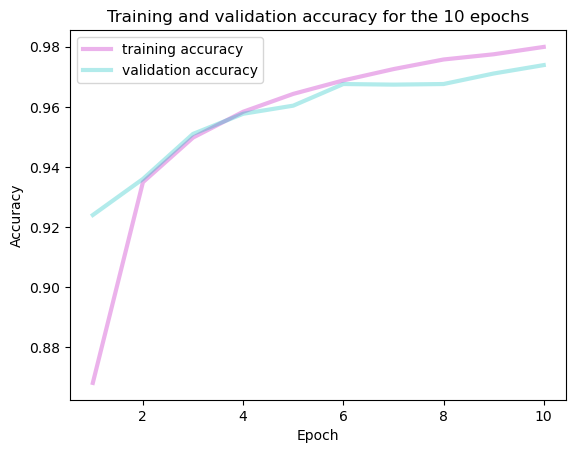

In [9]:
train_accuracy= fit_info.history['accuracy']
label_1='training accuracy'
label_2='validation accuracy'
val_accuracy= fit_info.history['val_accuracy']
x_epoch=list(range(1,11))
plt.plot(x_epoch, train_accuracy, 'm', label = label_1, linewidth=3, alpha=0.3)
plt.plot(x_epoch, val_accuracy, 'c', label = label_2, linewidth=3, alpha=0.3)
plt.legend()
plt.title('Training and validation accuracy for the 10 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

2.4. Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights 2 (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

Answer: It is possible that amount of epochs is what gives us a result lower than Geoff Hintons since we do not know how many epochs he had.

In [54]:
## Define model ##
regularization_factors=[0.001,0.0001,0.0005,0.00001,0.000001]
val_acc_0_001=[]
val_acc_0_0001=[]
val_acc_0_0005=[]
val_acc_0_00001=[]
val_acc_0_000001=[]

#regularization factor 0.001
for _ in range(3):
    model_3 = Sequential()
    model_3.add(Flatten())
    model_3.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))

    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
    epochs = 40
    fit_info = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_3.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_001.append(fit_info.history['val_accuracy'][-1])

mean_0_001= np.mean(val_acc_0_001)
std_0_001=np.std(val_acc_0_001)
#print(val_acc_0_001)
print('mean=', mean_0_001)
print('std=', std_0_001)



Epoch 1/40
469/469 [==============================] - 2s 3ms/step - loss: 7.0757 - accuracy: 0.7960 - val_loss: 3.4150 - val_accuracy: 0.9021
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 2.0237 - accuracy: 0.8801 - val_loss: 1.2535 - val_accuracy: 0.8932
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 1.0651 - accuracy: 0.8927 - val_loss: 0.8709 - val_accuracy: 0.9098
Epoch 4/40
469/469 [==============================] - 1s 3ms/step - loss: 0.8170 - accuracy: 0.9087 - val_loss: 0.7243 - val_accuracy: 0.9169
Epoch 5/40
469/469 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.9173 - val_loss: 0.6282 - val_accuracy: 0.9300
Epoch 6/40
469/469 [==============================] - 1s 3ms/step - loss: 0.6423 - accuracy: 0.9232 - val_loss: 0.5837 - val_accuracy: 0.9363
Epoch 7/40
469/469 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.9325 - val_loss: 0.5118 - val_accuracy: 0.9472
Epoch 

In [49]:
#regularization factor 0.0001
for _ in range(3):
    model_4 = Sequential()
    model_4.add(Flatten())
    model_4.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))

    model_4.add(Dense(num_classes, activation='softmax'))
    model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_4.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0001.append(fit_info.history['val_accuracy'][-1])

mean_0_0001= np.mean(val_acc_0_0001)
std_0_0001=np.std(val_acc_0_0001)
#print(val_acc_0_0001)
print('mean=', mean_0_0001)
print('std=', std_0_0001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 1.5777 - accuracy: 0.8334 - val_loss: 1.2377 - val_accuracy: 0.9227
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 1.1500 - accuracy: 0.9380 - val_loss: 1.0660 - val_accuracy: 0.9482
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 1.0099 - accuracy: 0.9531 - val_loss: 0.9488 - val_accuracy: 0.9587
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.8963 - accuracy: 0.9632 - val_loss: 0.8486 - val_accuracy: 0.9635
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.8049 - accuracy: 0.9663 - val_loss: 0.8317 - val_accuracy: 0.9443
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.7214 - accuracy: 0.9700 - val_loss: 0.6887 - val_accuracy: 0.9682
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6468 - accuracy: 0.9725 - val_loss: 0.6577 - val_accuracy: 0.9591
Epoch 

In [53]:
#regularization factor 0.0005
for _ in range(3):
    model_5 = Sequential()
    model_5.add(Flatten())
    model_5.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))

    model_5.add(Dense(num_classes, activation='softmax'))
    model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_5.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0005.append(fit_info.history['val_accuracy'][-1])

mean_0_0005 = np.mean(val_acc_0_0005)
std_0_0005 =np.std(val_acc_0_0005)
#print(val_acc_0_0005)
print('mean=', mean_0_0005)
print('std=', std_0_0005)

Epoch 1/40
469/469 [==============================] - 2s 3ms/step - loss: 4.7780 - accuracy: 0.8251 - val_loss: 3.4303 - val_accuracy: 0.9076
Epoch 2/40
469/469 [==============================] - 1s 3ms/step - loss: 2.5627 - accuracy: 0.9229 - val_loss: 1.8164 - val_accuracy: 0.9374
Epoch 3/40
469/469 [==============================] - 1s 3ms/step - loss: 1.3786 - accuracy: 0.9311 - val_loss: 1.0524 - val_accuracy: 0.9146
Epoch 4/40
469/469 [==============================] - 1s 3ms/step - loss: 0.8500 - accuracy: 0.9334 - val_loss: 0.7274 - val_accuracy: 0.9393
Epoch 5/40
469/469 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.9373 - val_loss: 0.6170 - val_accuracy: 0.9404
Epoch 6/40
469/469 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.9441 - val_loss: 0.5398 - val_accuracy: 0.9469
Epoch 7/40
469/469 [==============================] - 1s 3ms/step - loss: 0.5311 - accuracy: 0.9448 - val_loss: 0.4811 - val_accuracy: 0.9538
Epoch 

In [46]:
#regularization factor 0.00001
for _ in range(3):
    model_6 = Sequential()
    model_6.add(Flatten())
    model_6.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))

    model_6.add(Dense(num_classes, activation='softmax'))
    model_6.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_6.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_00001.append(fit_info.history['val_accuracy'][-1])

mean_0_00001= np.mean(val_acc_0_00001)
std_0_00001=np.std(val_acc_0_00001)
#print(val_acc_0_00001)
print('mean=', mean_0_00001)
print('std=', std_0_00001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6617 - accuracy: 0.8292 - val_loss: 0.3190 - val_accuracy: 0.9354
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2972 - accuracy: 0.9424 - val_loss: 0.2652 - val_accuracy: 0.9531
Epoch 3/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2468 - accuracy: 0.9583 - val_loss: 0.2495 - val_accuracy: 0.9548
Epoch 4/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2188 - accuracy: 0.9663 - val_loss: 0.2332 - val_accuracy: 0.9606
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2009 - accuracy: 0.9715 - val_loss: 0.2046 - val_accuracy: 0.9686
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1867 - accuracy: 0.9755 - val_loss: 0.1980 - val_accuracy: 0.9701
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1764 - accuracy: 0.9785 - val_loss: 0.2129 - val_accuracy: 0.9638
Epoch 

In [50]:
#regularization factor 0.000001
for _ in range(3):
    model_7 = Sequential()
    model_7.add(Flatten())
    model_7.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))

    model_7.add(Dense(num_classes, activation='softmax'))
    model_7.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_7.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_000001.append(fit_info.history['val_accuracy'][-1])

mean_0_000001= np.mean(val_acc_0_000001)
std_0_000001=np.std(val_acc_0_000001)
#print(val_acc_0_000001)
print('mean=', mean_0_000001)
print('std=', std_0_000001)

Epoch 1/40
469/469 [==============================] - 3s 4ms/step - loss: 0.5798 - accuracy: 0.8225 - val_loss: 0.2511 - val_accuracy: 0.9270
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2093 - accuracy: 0.9406 - val_loss: 0.1882 - val_accuracy: 0.9441
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1534 - accuracy: 0.9568 - val_loss: 0.1506 - val_accuracy: 0.9558
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1243 - accuracy: 0.9656 - val_loss: 0.1356 - val_accuracy: 0.9620
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1060 - accuracy: 0.9714 - val_loss: 0.1269 - val_accuracy: 0.9639
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0941 - accuracy: 0.9751 - val_loss: 0.1239 - val_accuracy: 0.9641
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0826 - accuracy: 0.9785 - val_loss: 0.1170 - val_accuracy: 0.9667
Epoch 

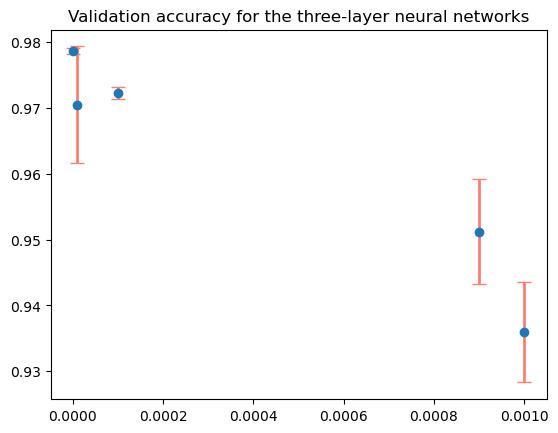

Maximum accuracy is 0.9786666631698608


In [57]:
regularization_factors=[0.001,0.0001,0.0005,0.00001,0.000001]

stds = [std_0_001,std_0_0001,std_0_0005,std_0_00001,std_0_000001]
xval=(0.001,0.0001,0.0009,0.00001,0.000001)
#aka yval:
means = [mean_0_001,mean_0_0001,mean_0_0005,mean_0_00001,mean_0_000001]

#plt.errorbar(xval,means,yerr=std_0_001, label='line1')
#plt.errorbar(xval,means,yerr=stds)

plt.errorbar(xval,means,yerr=stds,fmt='o',ecolor='salmon', elinewidth=2, capsize=5)
plt.title('Validation accuracy for the three-layer neural networks')
#plt.legend(loc='upper right')
plt.show()
print('Maximum accuracy is', np.max(means))

Maximum accuracy is 0.9786666631698608


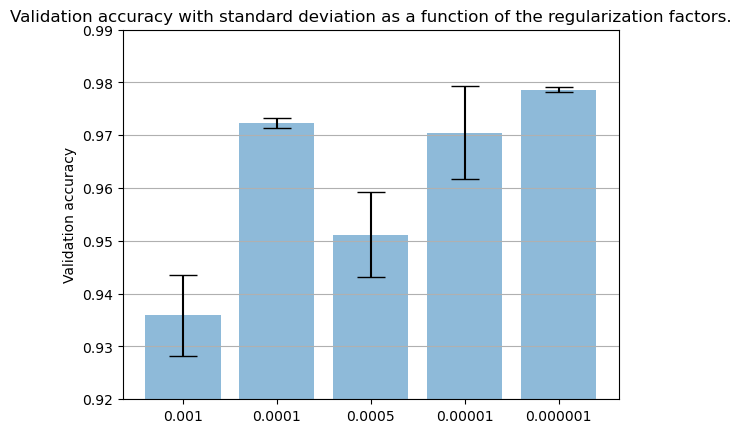

In [64]:
labels=['0.001','0.0001','0.0005','0.00001','0.000001']
means = [mean_0_001,mean_0_0001,mean_0_0005,mean_0_00001,mean_0_000001]
stds = [std_0_001,std_0_0001,std_0_0005,std_0_00001,std_0_000001]
x_pos=np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Validation accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Validation accuracy with standard deviation as a function of the regularization factors.')
ax.yaxis.grid(True)
plt.ylim([0.92,0.99])
print('Maximum accuracy is', np.max(means))


Question 3: Convolutional layers

3.1. Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe
what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

In [65]:
model_8 = Sequential()


#chose kernel_size=(3,3) because när jag googla så stod det
# att det är vanligt för fine-grained patterns
#(28,28,1) betyder 28x28 pixels i grayscale
model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))

#The pooling layer is applied after the Convolutional layer and is 
#used to reduce the dimensions of the feature map which helps in 
#preserving the important information or features of the input image 
#and reduces the computation time.
model_8.add(MaxPooling2D(pool_size=(2,2)))

model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))

model_8.add(Flatten())

model_8.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
model_8.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))

model_8.add(Dense(num_classes, activation='softmax'))
model_8.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
epochs = 2
fit_info = model_8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/2
469/469 [==============================] - 13s 27ms/step - loss: 0.3884 - accuracy: 0.8923 - val_loss: 0.1217 - val_accuracy: 0.9690
Epoch 2/2
469/469 [==============================] - 14s 31ms/step - loss: 0.1086 - accuracy: 0.9752 - val_loss: 0.0804 - val_accuracy: 0.9832
Test loss: 0.08035435527563095, Test accuracy 0.9832000136375427


In [35]:
model_8.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_26 (Flatten)        (None, 1600)              0         
                                                                 
 dense_126 (Dense)           (None, 500)             

In [41]:
#regularization factor 0.00001
val_acc_99=[]
for _ in range(3):
    model_99 = Sequential()
    model_99.add(Flatten())
    model_99.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.00001)))
    model_99.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_99.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_99.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))

    model_99.add(Dense(num_classes, activation='softmax'))
    model_99.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 1
    fit_info = model_99.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_99.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_99.append(fit_info.history['val_accuracy'])

mean_99= np.mean(val_acc_99)
std_99=np.std(val_acc_99)
print(val_acc_99)
print('mean=', mean_99)
print('std=', std_99)

469/469 [==============================] - 2s 4ms/step - loss: 0.6817 - accuracy: 0.8232 - val_loss: 0.3424 - val_accuracy: 0.9266
Test loss: 0.34235408902168274, Test accuracy 0.9265999794006348
469/469 [==============================] - 2s 3ms/step - loss: 0.6572 - accuracy: 0.8312 - val_loss: 0.3282 - val_accuracy: 0.9336
Test loss: 0.3281628489494324, Test accuracy 0.9336000084877014
469/469 [==============================] - 2s 3ms/step - loss: 0.6515 - accuracy: 0.8297 - val_loss: 0.3420 - val_accuracy: 0.9279
Test loss: 0.34196388721466064, Test accuracy 0.9279000163078308
[[0.9265999794006348], [0.9336000084877014], [0.9279000163078308]]
mean= 0.929366668065389


NameError: name 'std_99' is not defined